In [ ]:
# SLNN or LR
# You should install skitlearn and pandas libraries before use these codes
# otherwise you might get errors.

In [120]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784')

In [147]:
type(dataset), type(dataset["data"]), type(dataset["target"])

(sklearn.utils.Bunch, pandas.core.frame.DataFrame, pandas.core.series.Series)

In [126]:
X, y = dataset["data"].to_numpy(), dataset["target"].to_numpy()

In [127]:
X = X / 225
X.shape

(70000, 784)

In [128]:
y.shape

(70000,)

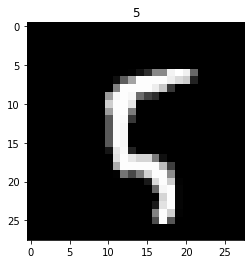

In [131]:
i = 100
img1 = X[i,:].reshape(28, 28)
plt.imshow(img1, cmap = 'gray')
plt.title(y[i])
plt.show()

In [132]:
y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [133]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [134]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

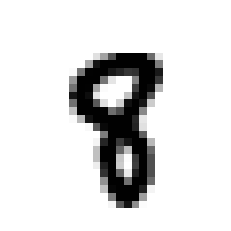

[0.]


In [141]:
j = 3
plt.imshow(X_train[:,j].reshape(28,28), cmap = plt.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,j])

In [142]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [143]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [144]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.6646369842939832
Epoch 100 cost:  2.8164398423404134e-06
Epoch 200 cost:  2.8076075020067584e-06
Epoch 300 cost:  2.798834977016074e-06
Epoch 400 cost:  2.7901216431101046e-06
Epoch 500 cost:  2.7814668848179714e-06
Epoch 600 cost:  2.7728700952998685e-06
Epoch 700 cost:  2.764330676196794e-06
Epoch 800 cost:  2.755848037479926e-06
Epoch 900 cost:  2.7474215973049353e-06
Epoch 1000 cost:  2.7390507818713926e-06
Epoch 1100 cost:  2.7307350252800806e-06
Epoch 1200 cost:  2.7224737693987583e-06
Epoch 1300 cost:  2.7142664637272176e-06
Epoch 1400 cost:  2.706112565265198e-06
Epoch 1500 cost:  2.698011538386565e-06
Epoch 1600 cost:  2.6899628547110895e-06
Epoch 1700 cost:  2.6819659929813993e-06
Epoch 1800 cost:  2.6740204389435726e-06
Epoch 1900 cost:  2.6661256852289463e-06
Final cost: 2.6583594284200564e-06


In [145]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))

[[10000]]


In [146]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

